In [88]:
import pandas as pd
import numpy as np

#With the goal above, I will import only what I need
import sklearn
from sklearn.ensemble import RandomForestRegressor

#The error metric. In this case we will use c-stat
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split

%matplotlib inline

In [89]:
X = pd.read_pickle('player_2016_2018.pkl')

In [90]:
X = X.dropna()

In [106]:
X.columns

Index(['DATE', 'PLAYER', 'POSITION', 'TEAM', 'OPPONENT', 'ROAD_HOME',
       'DraftKings_PTS', 'DK_SAL', 'MINUTES_roll2', 'MINUTES_roll3',
       'MINUTES_roll5', 'MINUTES_roll10', 'DraftKings_PTS_roll2',
       'DraftKings_PTS_roll3', 'DraftKings_PTS_roll5', 'DraftKings_PTS_roll10',
       'USAGE_roll2', 'USAGE_roll3', 'USAGE_roll5', 'USAGE_roll10',
       'REST DAYS', 'OPENING TOTAL', 'FAVORITE', 'SPREAD_10+', 'PACE_roll2',
       'PACE_roll3', 'PACE_roll5', 'PACE_roll10', 'OEFF_roll2', 'OEFF_roll3',
       'OEFF_roll5', 'OEFF_roll10', 'DEFF_roll2', 'DEFF_roll3', 'DEFF_roll5',
       'DEFF_roll10', 'opp_C_allowed_roll3', 'opp_C_allowed_roll5',
       'opp_C_allowed_roll10', 'opp_C_allowed_roll25', 'opp_PF_allowed_roll3',
       'opp_PF_allowed_roll5', 'opp_PF_allowed_roll10',
       'opp_PF_allowed_roll25', 'opp_PG_allowed_roll3', 'opp_PG_allowed_roll5',
       'opp_PG_allowed_roll10', 'opp_PG_allowed_roll25',
       'opp_SF_allowed_roll3', 'opp_SF_allowed_roll5', 'opp_SF_allowed_rol

In [92]:
X = X.drop(['C_DK_PTS', 'PF_DK_PTS', 'PG_DK_PTS',
       'SF_DK_PTS', 'SG_DK_PTS', 'opp_C_allowed', 'opp_PF_allowed',
       'opp_PG_allowed', 'opp_SF_allowed', 'opp_SG_allowed','DK_PTS_PER_MIN','PACE', 'OEFF', 'DEFF','MINUTES','USAGE'], axis = 1)

In [94]:
X_train, X_test = train_test_split(X, test_size=0.2)


In [95]:
y_train = X_train.pop('DraftKings_PTS')
y_test = X_test.pop('DraftKings_PTS')



In [96]:
# Get the numeric variables by only selecting the variables that are not 'object' datatypes
numeric_variables = list(X_train.dtypes[X_train.dtypes != "object"].index)
X_train[numeric_variables].head()
#A good way to get a FAST model, as FAST as possible, is to ignore all the categorical variables.

,MINUTES_roll2,MINUTES_roll3,MINUTES_roll5,MINUTES_roll10,DraftKings_PTS_roll2,DraftKings_PTS_roll3,DraftKings_PTS_roll5,DraftKings_PTS_roll10,USAGE_roll2,USAGE_roll3,...,opp_PACE_roll10,opp_OEFF_roll2,opp_OEFF_roll3,opp_OEFF_roll5,opp_OEFF_roll10,opp_DEFF_roll2,opp_DEFF_roll3,opp_DEFF_roll5,opp_DEFF_roll10,Start
47669,20.560,15.830000,12.270,12.887,14.125,12.750000,11.100,10.600,7.414502,9.323493,...,98.036941,122.279360,117.231798,114.575252,112.453816,119.988034,120.605926,118.558213,115.408845,0.0
3539,3.265,3.836667,4.660,4.660,0.750,0.833333,2.375,2.375,4.462061,9.016173,...,96.751554,112.175914,109.907544,108.341963,111.473815,101.565476,102.138402,104.984849,108.410592,0.0
31942,28.815,29.586667,30.908,26.019,34.375,36.083333,38.850,28.850,22.152599,23.277135,...,95.377857,96.770327,96.375740,99.150349,103.455588,103.700149,103.766247,109.036668,110.107092,1.0
23806,29.535,31.123333,32.424,31.453,21.375,30.583333,31.450,33.075,15.279608,19.021931,...,93.730421,116.910196,115.517000,111.711201,112.021920,123.112826,123.125579,120.634550,119.054023,1.0
39083,21.215,25.460000,24.800,23.035,11.750,15.083333,14.150,16.050,14.714739,14.676158,...,98.260364,116.961026,112.984271,113.086927,114.961469,115.422386,114.337849,109.831598,109.024133,1.0


In [97]:
#Lets build our first model. I always have oob=True. It is a good idea to increase n_estimators to a number higher
#than the default. In this case, the oob_predictions will be based on a forest of 33 trees. I set random state=42 so
#you all replicate the model exactly.
model = RandomForestRegressor(n_estimators = 100, oob_score = True, random_state = 42)

#I only use numeric variables because I have yet to dummy out the categorical variables
model.fit(X_train[numeric_variables],y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [98]:
model.oob_score_

0.55887367553873202

In [99]:
y_oob = model.oob_prediction_

In [100]:
len(y_oob)

40150

In [101]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train,y_oob))

7.2922624757


In [102]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train,y_oob))

87.7378157787


In [103]:
9.15806647222 ** 2

83.87018150960007

In [104]:
print(np.sqrt(mean_squared_error(y_train,y_oob)))


9.3668466294


MINUTES_roll2            0.011002
MINUTES_roll3            0.009347
MINUTES_roll5            0.008555
MINUTES_roll10           0.009512
DraftKings_PTS_roll2     0.010054
DraftKings_PTS_roll3     0.012789
DraftKings_PTS_roll5     0.017061
DraftKings_PTS_roll10    0.553240
USAGE_roll2              0.009892
USAGE_roll3              0.008597
USAGE_roll5              0.009060
USAGE_roll10             0.011534
OPENING TOTAL            0.006943
FAVORITE                 0.001270
SPREAD_10+               0.000684
PACE_roll2               0.006763
PACE_roll3               0.006157
PACE_roll5               0.005733
PACE_roll10              0.006378
OEFF_roll2               0.007286
OEFF_roll3               0.006458
OEFF_roll5               0.006433
OEFF_roll10              0.006922
DEFF_roll2               0.007621
DEFF_roll3               0.006482
DEFF_roll5               0.006296
DEFF_roll10              0.006743
opp_C_allowed_roll3      0.006864
opp_C_allowed_roll5      0.006771
opp_C_allowed_

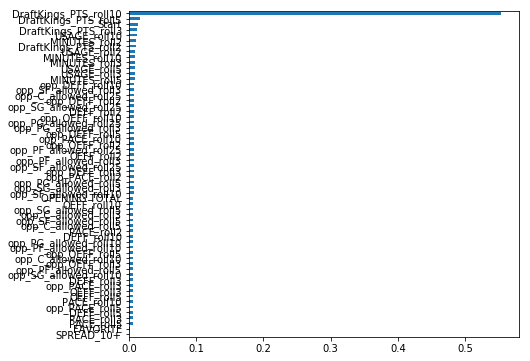

In [105]:
#from ipykernel import kernelapp as app

feature_importances = pd.Series(model.feature_importances_, index=X[numeric_variables].columns)
print(feature_importances)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(7,6))